# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

<font color='#5F9EA0'># Свои комментарии буду оставлять цветом CadetBlue    

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# # будем отображать графики прямо в jupyter'e
# %matplotlib inline
# # #графики в svg выглядят более четкими
# %config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
df.columns

Index(['total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition'], dtype='object')

In [5]:
df.head(2)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...


<font color='#5F9EA0'># Разделителем в данном датасете служит: ‘\t’

In [6]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

In [7]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

### Вывод

<font color='#5F9EA0'># Таблица с данными сохранена в формате csv, с разделителем '\t'. Не все типы данных определились правильно

### Шаг 2. Предобработка данных

<font color='#5F9EA0'># Некоторые признаки без пропусков, которые pandas считал как object, явно приведем к своим типам

In [9]:
df['total_area'] = df.total_area.astype('float64')
df['last_price'] = df.last_price.astype('float64')
df['ceiling_height'] = df.ceiling_height.astype('float64')
df['living_area'] = df.living_area.astype('float64')
df['floors_total'] = df.floors_total.astype('float64')
df['kitchen_area'] = df.kitchen_area.astype('float64')
df['balcony'] = df.balcony.astype('float64')
df['airports_nearest'] = df.airports_nearest.astype('float64')
df['cityCenters_nearest'] = df.cityCenters_nearest.astype('float64')
df['parks_around3000'] = df.parks_around3000.astype('float64')
df['parks_nearest'] = df.parks_nearest.astype('float64')
df['ponds_around3000'] = df.ponds_around3000.astype('float64')
df['ponds_nearest'] = df.ponds_nearest.astype('float64')
df['days_exposition'] = df.days_exposition.astype('float64')
df['is_apartment'] = df.is_apartment.astype('bool')

In [10]:
df['is_apartment'] = df.is_apartment.astype('bool')

In [11]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<font color='#5F9EA0'># В датасете много пропусков, попробуем определить их природу и найти закономерности

### <font color='#5F9EA0'># Сразу заполним пропуски *0* в ***balcony*** 

In [12]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df.balcony.astype('int64')

<font color='#5F9EA0'># Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

### <font color='#5F9EA0'># Заполним пропуски *False* в ***is_apartment*** 

In [13]:
df[df['is_apartment']==True]['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 10, 19, 16,
       20, 27, 25, 17, 14, 12, 18, 21, 28, 24, 23, 30, 29, 33, 31])

In [14]:
df[df['is_apartment']==True]['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Сертолово', 'Петергоф',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'Ломоносов',
       'деревня Фёдоровское', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Выборг',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'Сестрорецк', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая', 'Павловск',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',


<font color='#5F9EA0'># Тут я пытался найти связь/привязку **True** апартаментов к локации, чтобы попытаться заполнить пропуски исходя из имеющихся данных по локациям. Возможно есть локации, где все объявления с **True** апартаментами

In [15]:
df[df['is_apartment']==True].groupby('locality_name')['is_apartment'].count()

locality_name
Бокситогорск             13
Волосово                 34
Волхов                  104
Всеволожск              355
Выборг                  208
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: is_apartment, Length: 352, dtype: int64

In [16]:
df[df['is_apartment'].isna()==True].groupby('locality_name')['is_apartment'].count()

Series([], Name: is_apartment, dtype: int64)

In [17]:
df[df['is_apartment'].isna()]['locality_name'].value_counts(normalize=True)

Series([], Name: locality_name, dtype: float64)

<font color='#5F9EA0'># Ситуация как и с балконами, заполним **False**

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)

### <font color='#5F9EA0'># Изучение *days_exposition:*

In [19]:
days_exposition_isnull = df[df['days_exposition'].isnull()== True]

In [20]:
days_exposition_isnull.groupby('locality_name')['days_exposition'].count()

locality_name
Бокситогорск            0
Волосово                0
Волхов                  0
Всеволожск              0
Выборг                  0
                       ..
село Никольское         0
село Павлово            0
село Рождествено        0
село Русско-Высоцкое    0
село Старая Ладога      0
Name: days_exposition, Length: 196, dtype: int64

<font color='#5F9EA0'># Благодаря полностью заполненному столбцу **last_price** мы знаем, что все обьявления были сняты с публикации, поэтому можно заполнить **days_exposition**

### <font color='#5F9EA0'># Заполнение **days_exposition:**

<font color='#5F9EA0'># Приведем **first_day_exposition** к формату datetime64[ns] и избавимся от ненужных часов 


In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [22]:
# сперва получим список по годам и месяцам
year_first_day_exposition = pd.DatetimeIndex(days_exposition_isnull['first_day_exposition']).year.value_counts().index.tolist()
month_first_day_exposition = pd.DatetimeIndex(days_exposition_isnull['first_day_exposition']).month.value_counts().index.tolist()

year_first_day_exposition, month_first_day_exposition

([2019, 2018, 2017, 2015, 2016, 2014], [4, 3, 2, 11, 1, 10, 12, 8, 9, 7, 5, 6])

In [23]:
for year in year_first_day_exposition:
        for month in month_first_day_exposition:
            median = df[(df['days_exposition'].notna()) &
                        (pd.DatetimeIndex(df['first_day_exposition']).year == year) &
                        (pd.DatetimeIndex(df['first_day_exposition']).month == month)
                       ]['days_exposition'].median()
            
            df.loc[((df['days_exposition'].isna()) &
                    (pd.DatetimeIndex(df['first_day_exposition']).year == year) &
                    (pd.DatetimeIndex(df['first_day_exposition']).month == month)), 'days_exposition'
                  ] = median

<font color='brown'>Классная реализация, но какие у нас основания полагать, что объявления, открытые в один месяц имеют примерно одинаковые сроки жизни?

<font color='#5F9EA0'># Для каждого пропуска каждой даты вычисляем медианное значение заполненных дат.
    <br>На самом деле, у нас нету никаких оснований пологать, что то объявления, открытые в один месяц имеют примерно одинаковые сроки жизни. Но это самый простой способ заполнения пропусков в этом столбце, который не играет сильную роль в нашем анализе

In [24]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,19.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,335.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,76.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,True,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<font color='#5F9EA0'># Проверяем

In [25]:
df['days_exposition'].isna().sum()

0

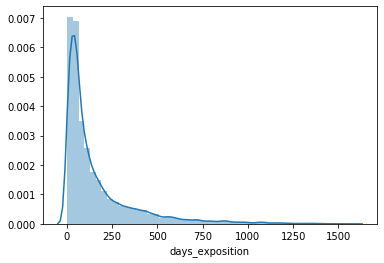

In [26]:
sns.distplot(df['days_exposition'])

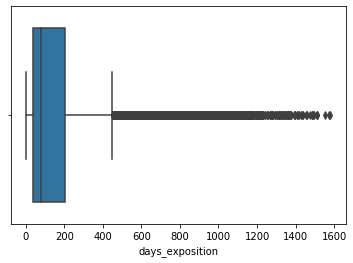

In [27]:
sns.boxplot(x='days_exposition', data=df)

<font color='#5F9EA0'># Для удобства переведем в int

In [28]:
df['days_exposition'] = df.days_exposition.astype('int64')

### <font color='#5F9EA0'># Изучение *living_area* и *kitchen_area*

In [29]:
df['living_area'].isna().sum()

1903

In [30]:
df.corr()['living_area'].reset_index(name='correlation')

,index,correlation
0,total_images,0.104780
1,last_price,0.566492
2,total_area,0.939537
3,rooms,0.845977
4,ceiling_height,0.090650
5,floors_total,-0.169311
6,living_area,1.000000
7,floor,-0.097210
8,is_apartment,-0.009535
9,studio,-0.056231


<font color='#5F9EA0'>#Корреляция говорит о большой зависимости жилой площади от общей площади, количества комнат и меньшей зависимости от площади кухни и цены объявления.

In [31]:
df['living_area'] = df['living_area'].fillna(-1)
df['kitchen_area'] = df['kitchen_area'].fillna(-1)

In [32]:
df['living_area'].describe(include='all')

count    23699.000000
mean        31.610631
std         23.221116
min         -1.000000
25%         17.800000
50%         29.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

In [33]:
top_total_area_df = df.query('locality_name == "Санкт-Петербург"')
# top_total_area_df

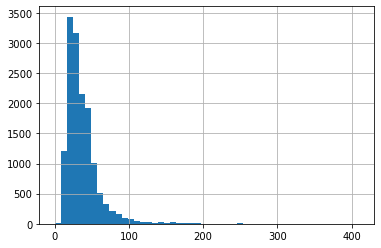

In [34]:
top_total_area_df['living_area'].hist(bins = 50, range = (0,410))
plt.show()

In [35]:
df['kitchen_area'].describe(include='all')

count    23699.000000
mean         9.457692
std          6.569058
min         -1.000000
25%          6.300000
50%          9.000000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

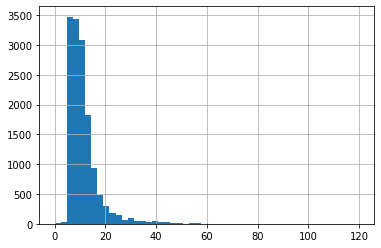

In [36]:
top_total_area_df['kitchen_area'].hist(bins = 50, range = (0,120))
plt.show()

### <font color='#5F9EA0'># Заполним пропуски в living_area и kitchen_area соотношением общей площади

In [37]:
total_area_mean = df['total_area'].median()
living_area_mean = df['living_area'].median()
kitchen_area_mean = df['kitchen_area'].median()
print(total_area_mean)
print(living_area_mean)
print(kitchen_area_mean)

52.0
29.0
9.0


In [38]:
total_area_and_living_area = total_area_mean/living_area_mean
total_area_and_living_area

1.793103448275862

In [39]:
total_area_and_kitchen_area = total_area_mean/kitchen_area_mean
total_area_and_kitchen_area

5.777777777777778

In [40]:
def fill_living_area(row):
    if row['living_area'] == -1:
        return row['total_area'] / total_area_and_living_area
    return row['living_area']

df['living_area'] = df.apply(fill_living_area, axis=1)

def fill_kitchen_area(row):
    if row['kitchen_area'] == -1:
        return row['total_area'] / total_area_and_kitchen_area
    return row['kitchen_area']

df['kitchen_area'] = df.apply(fill_kitchen_area, axis=1)

In [41]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

### <font color='#5F9EA0'># Изучение *floors_total*

In [42]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [43]:
df[df['floors_total'].isnull()== True].groupby('locality_name')['floors_total'].count()

locality_name
Красное Село                       0
Кудрово                            0
Санкт-Петербург                    0
городской посёлок Новоселье        0
деревня Новое Девяткино            0
поселок Мурино                     0
поселок городского типа Токсово    0
посёлок Бугры                      0
посёлок Мурино                     0
посёлок Стрельна                   0
посёлок Шушары                     0
посёлок Щеглово                    0
Name: floors_total, dtype: int64

### <font color='#5F9EA0'># Изучение *ceiling_height*

In [44]:
print (f"Средняя: {df[df['ceiling_height'].notna()]['ceiling_height'].mean().round(2)}")
print (f"Медианная: {df[df['ceiling_height'].notna()]['ceiling_height'].median()}")

Средняя: 2.77
Медианная: 2.65


 <font color='#5F9EA0'># Посмотрим высоту потолков по населенным пунктам

In [45]:
df.pivot_table(index = 'locality_name', values = 'ceiling_height', fill_value = df['ceiling_height'].median())

,ceiling_height
locality_name,
Бокситогорск,3.900000
Волосово,2.531579
Волхов,3.151207
Всеволожск,2.675625
Выборг,2.728776
...,...
садовое товарищество Рахья,2.600000
село Копорье,2.475000
село Павлово,2.690000


<font color='#5F9EA0'># Посмотрим жилую площадь по названиям населенных пунктов 

In [46]:
df.pivot_table(index = 'locality_name', values = 'total_area')

,total_area
locality_name,
Бокситогорск,48.075000
Волосово,50.184722
Волхов,49.655856
Всеволожск,56.022186
Выборг,56.150042
...,...
село Путилово,50.800000
село Рождествено,49.966667
село Русско-Высоцкое,49.155556


<font color='#5F9EA0'># Сколько у нас всего населенных пунктов

In [47]:
len(df['locality_name'].unique()) 

365

<font color='#5F9EA0'># Посмотрим минимальную и максимальную площадь квартир

In [48]:
df['total_area'].min(), df['total_area'].max()

(12.0, 900.0)

### <font color='#5F9EA0'># floors_total:

In [49]:
df['floor'].describe(include='all')

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [50]:
df.query('floor > floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<font color='#5F9EA0'># Выбросов нет

In [51]:
df[df['ceiling_height'].notna()]['ceiling_height'].corr(df[df['ceiling_height'].notna()]['last_price'])

0.08543030982842603

<font color='#5F9EA0'># Cтрока по изучению датасета отделилась от изучения высоты потолков

In [52]:
df[df['floors_total'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.800000,4,True,...,12.000000,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.750000,1,True,...,4.863462,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.400000,12,True,...,10.630000,0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.100000,8,True,...,16.800000,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,21.750000,9,True,...,6.750000,0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,35.413462,3,True,...,10.990385,0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.700000,20,True,...,14.400000,0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.380000,6,True,...,23.420000,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.400000,18,True,...,23.600000,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


<font color='#5F9EA0'># Заполним средним

In [53]:
floors_total_mean = df[df['floors_total'].notna()]['floors_total'].mean()
df['floors_total'] = df.fillna(floors_total_mean)

In [54]:
df[186:187]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,12,30.8,4,True,...,12.0,0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49


### <font color='#5F9EA0'># Изучение *total_area* и *ceiling_height*

<font color='#5F9EA0'># Посмотрим количество самых часто встречаемых населенных пунктов

In [55]:
df['locality_name'].value_counts().sort_values(ascending=False)

Санкт-Петербург                          15721
посёлок Мурино                             522
посёлок Шушары                             440
Всеволожск                                 398
Пушкин                                     369
                                         ...  
деревня Большое Рейзино                      1
городской посёлок Свирьстрой                 1
поселок Перово                               1
поселок городского типа Большая Ижора        1
деревня Нижняя                               1
Name: locality_name, Length: 364, dtype: int64

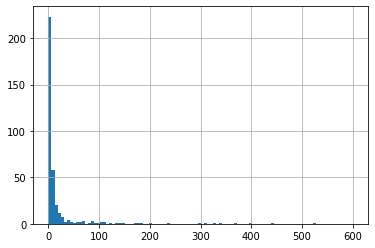

In [56]:
df['locality_name'].value_counts().sort_values(ascending=False).hist(bins=100, range=(0,600))

<font color='#5F9EA0'># Посмотрим обьявления с самыми большими площадями квартиры 

In [57]:
df.sort_values(by = 'total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.80,8,409.700000,25,True,...,112.000000,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106
12859,20,140000000.0,631.2,2019-04-09,7,3.90,20,322.300000,4,True,...,19.500000,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,9
3117,19,140000000.0,631.0,2019-03-30,7,NaN,19,351.903846,5,True,...,60.000000,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,19
15651,20,300000000.0,618.0,2017-12-18,7,3.40,20,258.000000,5,True,...,70.000000,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111
5358,20,65000000.0,590.0,2019-02-14,15,3.50,20,409.000000,3,True,...,100.000000,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000.0,13.2,2018-12-17,1,NaN,2,7.361538,1,True,...,2.284615,0,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19
19807,0,3800000.0,13.0,2018-07-04,1,NaN,0,10.000000,3,True,...,2.250000,0,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9
19546,3,1850000.0,13.0,2019-03-11,1,3.40,3,7.250000,2,False,...,2.250000,0,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24
17961,3,1400000.0,13.0,2017-12-03,1,2.60,3,7.250000,1,True,...,2.250000,0,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410


<font color='#5F9EA0'># Самые большие квартиры расположены в Санкт-Петербурге, около 66%

In [58]:
len(df[df['locality_name'] == 'Санкт-Петербург'])

15721

In [59]:
len(df['locality_name'])

23699

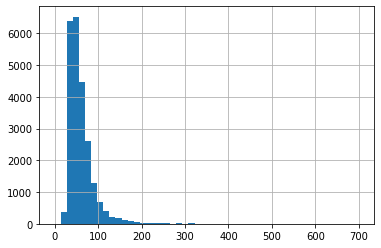

In [60]:
df['total_area'].hist(bins = 50, range = (0,700))
plt.show()

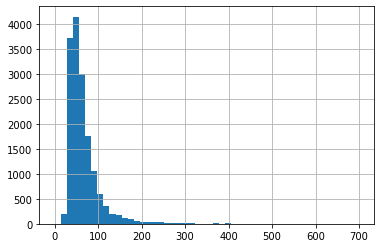

In [61]:
top_total_area_df['total_area'].hist(bins = 50, range = (0,700))
plt.show()

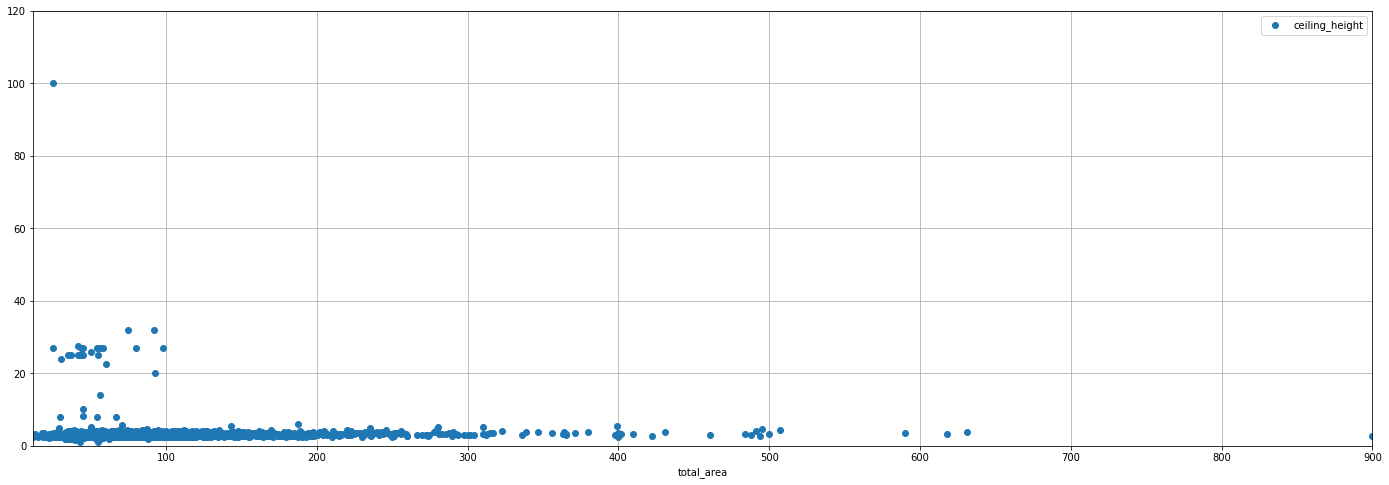

In [62]:
df.plot(x='total_area', y='ceiling_height', style='o', ylim=(0, 120), grid=True, figsize=(24, 8))

<font color='#5F9EA0'># можно заметить выбросы по размерам потолков в квартирах до 100 кв.м

<font color='#5F9EA0'># сделаем срез по размеру потолка и поищем причину выбросов 

In [63]:
big_ceiling_height_df = df.query('ceiling_height >= 5')
# big_ceiling_height_df

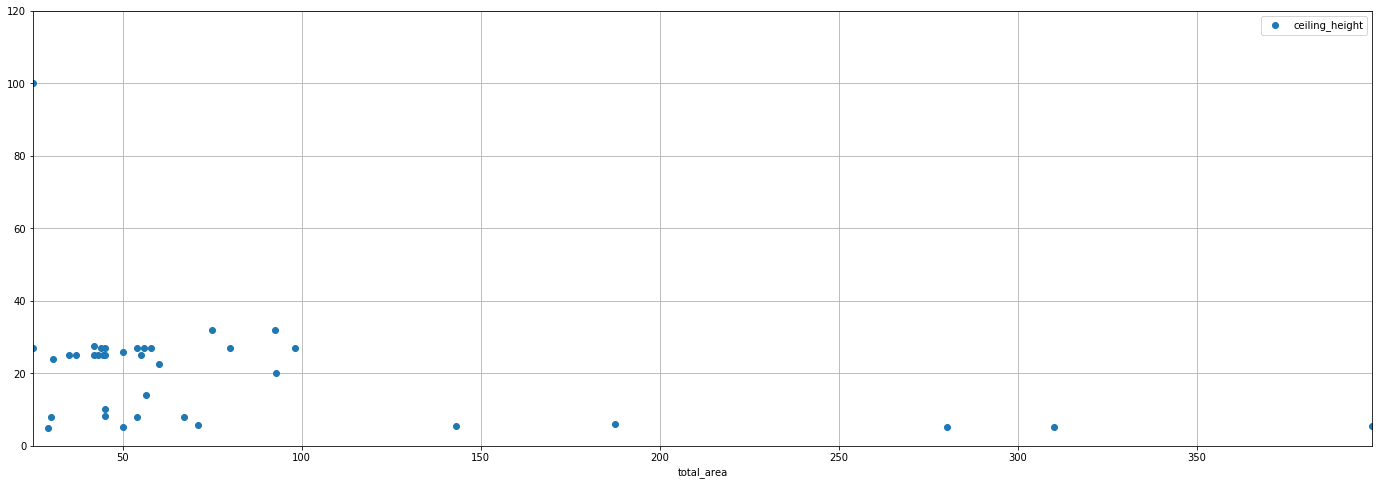

In [64]:
big_ceiling_height_df.plot(x='total_area', y='ceiling_height', style='o', ylim=(0, 120), grid=True, figsize=(24, 8))

In [65]:
big_ceiling_height_df['locality_name'].unique()

array(['Гатчина', 'Санкт-Петербург', 'Бокситогорск', 'Волхов',
       'деревня Нурма', 'посёлок Мурино', 'деревня Мины', 'Кронштадт',
       'Луга', 'поселок Новый Свет', 'Красное Село',
       'городской поселок Большая Ижора', 'деревня Нижняя'], dtype=object)

In [66]:
big_ceiling_height_df['floor'].unique()

array([ 2,  7,  3,  1,  6, 17, 13, 14,  5,  4, 11, 19, 15])

In [67]:
big_ceiling_height_df[big_ceiling_height_df['open_plan']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4876,7,3000000.0,25.0,2017-09-27,0,27.0,7,17.0,17,True,...,4.326923,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28


In [68]:
big_ceiling_height_df['total_area']

355       55.2
464      280.3
1026     310.0
1053      29.0
1388     399.0
3148      75.0
3474      30.0
4643      45.0
4876      25.0
5076      30.5
5246      54.0
5669      50.0
5807      80.0
5863      45.0
6246      44.4
7578     143.0
9379      42.0
10773     58.0
11285     37.0
12628     50.0
14382     35.0
15061     56.4
15743     67.0
17442     54.0
17496     92.9
17857     56.0
18545     43.0
20264    187.6
20478     45.0
20507     60.0
21227     71.0
21377     42.0
21824     44.0
22309     45.0
22336     92.4
22869     25.0
22938     98.0
Name: total_area, dtype: float64

<font color='#5F9EA0'># Выбросы с высокими потолками в большей части находятся в маленьких квартирах, но относительного всего датасета занимают маленькую часть, поэтому мы просто их уберем 

<font color='#5F9EA0'># А вообще ""Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра""

In [69]:
ceiling_height_in_apartment = df[{'ceiling_height','is_apartment'}]

In [70]:
ceiling_height_in_apartment[ceiling_height_in_apartment['is_apartment']==True]

,ceiling_height,is_apartment
0,2.70,True
1,NaN,True
2,NaN,True
3,NaN,True
4,3.03,True
...,...,...
23694,3.70,True
23695,NaN,True
23696,NaN,True
23697,3.00,True


In [71]:
ceiling_height_in_apartment['ceiling_height'].describe(include='all')

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<font color='#5F9EA0'># Но, поскольку, в списке есть апартаменты, которые раньше могли иметь нежилое назначение, пределом будет 5м

#### <font color='#5F9EA0'># Заполним *ceiling_height* Медианой

In [72]:
df['ceiling_height'].isna().sum()

9195

<font color='#5F9EA0'># Заполним высоту потолков медианами в соответствии с этажностью домов. 

In [73]:
min_floors_total = int(df['floors_total'].quantile(q=[0.4,0.9]).loc[0.4])
print("Маленькие дома имеют кол-во этажей: ", min_floors_total)
max_floors_total = int(df['floors_total'].quantile(q=[0.4,0.9]).loc[0.9])
print("Большие дома имеют кол-во этажей: ", max_floors_total)


print('\n')
median_ceiling_height_five_floors_total = df.query('floors_total == 5')['ceiling_height'].median()
print("Медиана высоты потолков в пятэтажных домах: ", median_ceiling_height_five_floors_total)
print('\n')


median_ceiling_height_min_floors_total = df.query('floors_total <= @min_floors_total')['ceiling_height'].median()
print("Медиана высоты потолков в маленьких домах: ", median_ceiling_height_min_floors_total)

median_ceiling_height_mid_floors_total = df.query('floors_total >= @min_floors_total and floor <= @max_floors_total')['ceiling_height'].median()
print("Медиана высоты потолков в средних домах: ", median_ceiling_height_mid_floors_total)

median_ceiling_height_max_floors_total = df.query('floors_total >= @max_floors_total')['ceiling_height'].median()
print("Медиана высоты потолков в больших домах: ", median_ceiling_height_max_floors_total)

Маленькие дома имеют кол-во этажей:  8
Большие дома имеют кол-во этажей:  19


Медиана высоты потолков в пятэтажных домах:  2.6


Медиана высоты потолков в маленьких домах:  2.65
Медиана высоты потолков в средних домах:  2.65
Медиана высоты потолков в больших домах:  2.7


In [74]:
df['ceiling_height'] = df['ceiling_height'].fillna(-1)

In [75]:
df['ceiling_height'].unique()

array([  2.7 ,  -1.  ,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

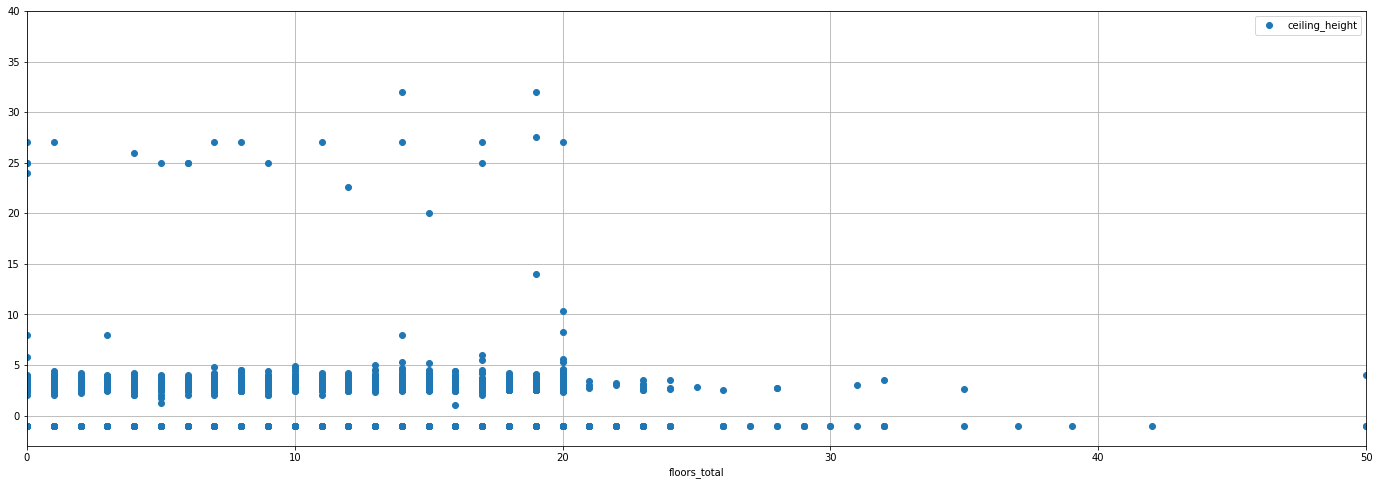

In [76]:
df.plot(x='floors_total', y='ceiling_height',ylim=(-3,40) , style='o', grid=True, figsize=(24, 8))

In [77]:
def fill_ceiling_height(row):
    if row['ceiling_height'] == -1:
        
        if row['floors_total'] == 5:
            row['ceilign_height'] = median_ceiling_height_five_floors_total
            return row['ceilign_height']                
        
        if row['floors_total'] <= min_floors_total:
            row['ceilign_height'] = median_ceiling_height_min_floors_total
            return row['ceilign_height']
    
        if min_floors_total < row['floors_total'] <= max_floors_total:
            row['ceilign_height'] = median_ceiling_height_mid_floors_total
            return row['ceilign_height']
    
        if row['floors_total'] > max_floors_total :
            row['ceilign_height'] = median_ceiling_height_max_floors_total
            return row['ceilign_height']
    return row['ceiling_height'] 

df['ceiling_height'] = df.apply(fill_ceiling_height, axis=1)

In [78]:
df[df['ceiling_height']==-1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [79]:
df['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [80]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.6 ,   2.5 ,   2.67,   2.56,   3.05,
         2.75,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

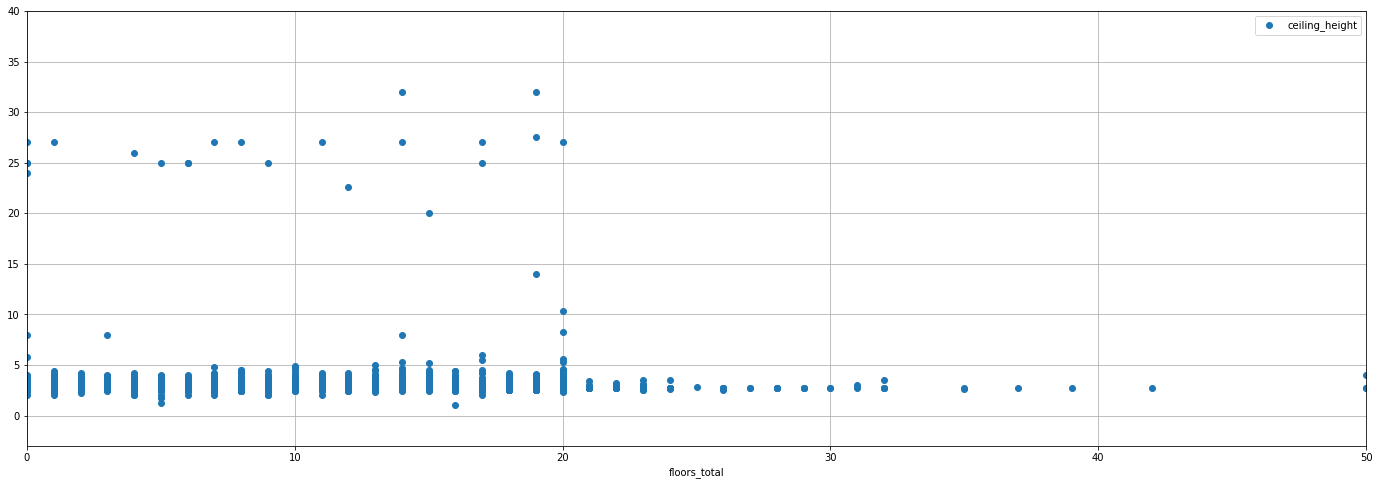

In [81]:
df.plot(x='floors_total', y='ceiling_height',ylim=(-3,40) , style='o', grid=True, figsize=(24, 8))

#### <font color='#5F9EA0'># Оставим в датасете обьявления КВАРТИР с потолками от 2 до 5 м 

In [82]:
df['ceiling_height'].describe(include='all')

count    23699.000000
mean         2.724335
std          0.988358
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [83]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

#### <font color='#5F9EA0'>#  Для заполнения пропусков в остальных столбцах недостаточно данных, поэтому заполним их *-1*

In [84]:
df['locality_name'] = df['locality_name'].fillna('undefined')
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1)
df['parks_around3000'] = df['parks_around3000'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['ponds_around3000'] = df['ponds_around3000'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)

In [85]:
df.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

### <font color='#5F9EA0'># Пропуски заполнили 

### Шаг 3. Посчитаем и добавим в таблицу

### <font color='#5F9EA0'># days_exposition :

#### <font color='#5F9EA0'>#   Сделаем категоризацию длительности обьявления 

In [86]:
df['days_exposition'] = df.days_exposition.astype('float64')

In [87]:
df['days_exposition'].describe(include='all')

count    23699.000000
mean       165.312714
std        213.048750
min          1.000000
25%         39.000000
50%         81.000000
75%        203.500000
max       1580.000000
Name: days_exposition, dtype: float64

In [88]:
min_days_exposition = df['days_exposition'].quantile(q=[0.4,0.9]).loc[0.4]
max_days_exposition = df['days_exposition'].quantile(q=[0.4,0.9]).loc[0.9]
min_days_exposition, max_days_exposition

(60.0, 436.0)

In [89]:
def days_exposition_kat(days):
    if (-1) <= days <= min_days_exposition:
        return 'fast'
    if min_days_exposition < days <= max_days_exposition:
        return 'medium '
    if days > max_days_exposition :
        return 'slow'
    return 'error'

df['days_exposition_kat'] = df['days_exposition'].apply(days_exposition_kat)

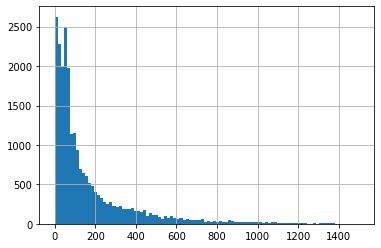

In [90]:
df['days_exposition'].hist(bins = 100, range = (0,1500))

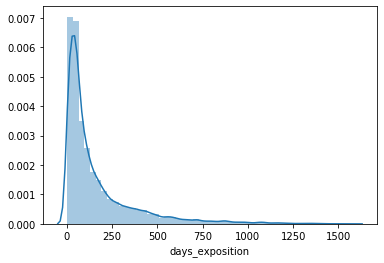

In [91]:
sns.distplot(df['days_exposition'])

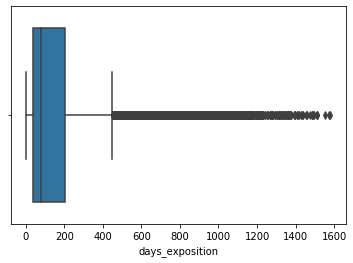

In [92]:
sns.boxplot(x='days_exposition', data=df)

<font color='#5F9EA0'># Обычно квартира либо продается сразу, либо в течении 3-х месяцев (90 дней). На гистограмме видно, что после 90-100 дней идет спад количества проданных квартир.

### <font color='#5F9EA0'># cityCenters_nearest :

<font color='#5F9EA0'># посмотрим зачения расстояния до центра в обьявлениях

<font color='#5F9EA0'># Для удобства переведем в км 

In [93]:
df['cityCenters_nearest'] = df.loc[:,'cityCenters_nearest']  / 1000

In [94]:
# df['cityCenters_nearest'] = df.cityCenters_nearest.astype('int64')

In [95]:
df['cityCenters_nearest'].describe(include='all')

count    23699.000000
mean        10.886194
std          9.634877
min         -0.001000
25%          2.242000
50%         11.247000
75%         15.248500
max         65.968000
Name: cityCenters_nearest, dtype: float64

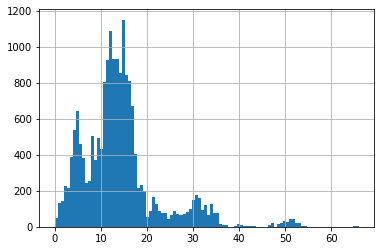

In [96]:
df['cityCenters_nearest'].hist(bins = 100, range = (0,66))

In [97]:
nan_cityCenters_nearest = df[df['cityCenters_nearest'] == -0.001]
not_nan_cityCenters_nearest = df[df['cityCenters_nearest'] != -0.001]

In [98]:
nan_cityCenters_nearest['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

In [99]:
not_nan_cityCenters_nearest['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'undefined',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

In [100]:
not_nan_cityCenters_nearest[not_nan_cityCenters_nearest['locality_name'] == 'посёлок Щеглово']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_kat
3817,1,1640000.0,23.98,2015-08-25,1,2.65,1,13.373462,1,True,...,0,посёлок Щеглово,61908.0,34.085,0.0,-1.0,0.0,-1.0,378.0,medium


<font color='#5F9EA0'>#   Заметим, что расстояния до центра пропущены в объявлениях, находящихся в населенных пунктах, в названии которых фигурирует: поселок, деревня. Вероятно центр там определить нельзя
Так же сокращение названия населенного пункта типа 'Коммунар' привело к ошибке определения расстояния до центра

### <font color='#5F9EA0'># Рассчитываем цену квадратного метра: last_price / total_area

In [101]:
df['meter_price'] = df['last_price'] / df['total_area']

### <font color='#5F9EA0'># Рассчитываем день недели, месяц и год публикации объявления

In [102]:
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

### <font color='#5F9EA0'># Рассчитываем этаж квартиры: Первый, последний, другой

In [103]:
def get_flat_floor (rows):
    floor = rows[0]
    floors_total = rows[1]
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

df['floor_kind_kat'] = df[['floor', 'floors_total']].apply(get_flat_floor, axis=1)

<font color='#5F9EA0'># Проверяем, что данные заполнились:

In [104]:
df['floor_kind_kat'].value_counts()

другой       19883
первый        2917
последний      899
Name: floor_kind_kat, dtype: int64

### <font color='#5F9EA0'># Расчитываем соотношение жилой площади к общей.

In [105]:
df['living_to_total_area'] = df['living_area'] / df['total_area']

### <font color='#5F9EA0'># Расчитываем соотношение площади кухни к общей площади.

In [106]:
df['living_to_total_area'] = df['kitchen_area'] / df['total_area']

In [107]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition_kat,meter_price,day_exposition,month_exposition,year_exposition,floor_kind_kat,living_to_total_area
0,20,13000000.0,108.00,2019-03-07,3,2.70,20,51.000000,8,True,...,2.0,755.0,19.0,fast,120370.370370,3,3,2019,другой,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,7,18.600000,1,True,...,0.0,-1.0,81.0,medium,82920.792079,1,12,2018,первый,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,10,34.300000,4,True,...,2.0,574.0,558.0,slow,92785.714286,3,8,2015,другой,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,0,88.673077,9,True,...,3.0,234.0,424.0,medium,408176.100629,4,7,2015,другой,0.173077
4,2,10000000.0,100.00,2018-06-19,2,3.03,2,32.000000,13,True,...,1.0,48.0,121.0,medium,100000.000000,1,6,2018,другой,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,9,73.300000,3,True,...,3.0,381.0,335.0,medium,72490.845228,1,3,2017,другой,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.65,14,38.000000,4,True,...,-1.0,-1.0,45.0,fast,52542.372881,0,1,2018,другой,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.65,18,29.700000,1,True,...,-1.0,-1.0,76.0,medium,44091.710758,6,2,2018,первый,0.173077
23697,13,11475000.0,76.75,2017-03-28,2,3.00,13,42.802885,12,True,...,3.0,196.0,602.0,slow,149511.400651,1,3,2017,другой,0.303583


### Шаг 4. Проведем исследовательский анализ данных:

цена в 700 миллионов и площадь в 900 м не выглядят типичными значениями. Устроим основательную чистку данных отдельным пунктом. 

### <font color='#5F9EA0'># Чистка ceiling_height

<font color='#5F9EA0'># По итогам изучения столбца сделаем срез

In [108]:
df = df.query('ceiling_height >= 2 and ceiling_height <= 5')

### <font color='#5F9EA0'># Чистка total_area 

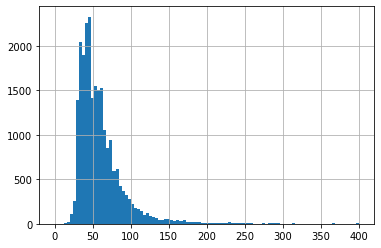

In [109]:
df['total_area'].hist(bins = 100, range = (0,400))
plt.show()

In [110]:
df[df['total_area'] >= 150]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition_kat,meter_price,day_exposition,month_exposition,year_exposition,floor_kind_kat,living_to_total_area
3,0,64900000.0,159.0,2015-07-24,3,2.65,0,88.673077,9,True,...,3.0,234.0,424.0,medium,408176.100629,4,7,2015,другой,0.173077
42,13,22000000.0,161.8,2015-07-08,4,2.80,13,80.900000,2,False,...,1.0,907.0,987.0,slow,135970.333745,2,7,2015,другой,0.108776
51,7,45000000.0,161.0,2017-10-17,3,3.20,7,38.000000,4,True,...,3.0,99.0,541.0,slow,279503.105590,1,10,2017,другой,0.310559
121,20,33000000.0,180.0,2017-02-17,3,2.90,20,86.000000,8,False,...,0.0,-1.0,144.0,medium,183333.333333,4,2,2017,другой,0.133333
147,10,27700000.0,179.6,2017-07-06,5,2.85,10,97.200000,25,True,...,1.0,806.0,75.0,medium,154231.625835,3,7,2017,другой,0.188196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,17,30000000.0,213.0,2017-09-28,7,3.40,17,151.400000,5,True,...,3.0,30.0,299.0,medium,140845.070423,3,9,2017,другой,0.144601
23448,3,14700000.0,180.0,2018-02-08,6,3.00,3,126.000000,5,True,...,2.0,616.0,76.0,medium,81666.666667,3,2,2018,другой,0.111111
23491,20,21800000.0,250.0,2017-09-16,3,2.70,20,104.000000,7,True,...,0.0,-1.0,49.0,fast,87200.000000,5,9,2017,другой,0.180000
23549,5,19600000.0,184.0,2016-04-21,3,3.00,5,55.700000,19,False,...,0.0,-1.0,205.0,medium,106521.739130,3,4,2016,другой,0.133152


In [111]:
df = df.query('total_area <= 150')

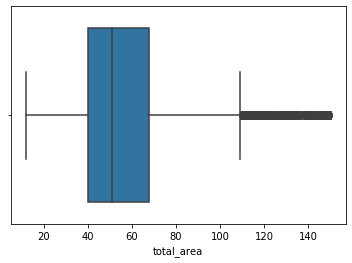

In [112]:
sns.boxplot(x='total_area', data=df)

### <font color='#5F9EA0'># Чистка last_price

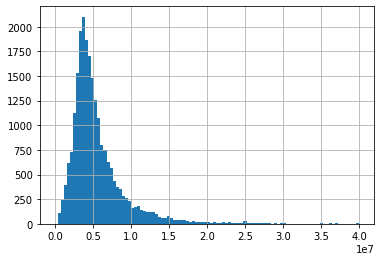

In [113]:
df['last_price'].hist(bins = 100, range = (0,40000000))
plt.show()

In [114]:
df[df['last_price'] >= 15000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition_kat,meter_price,day_exposition,month_exposition,year_exposition,floor_kind_kat,living_to_total_area
35,6,15500000.0,149.0,2017-06-26,5,2.65,6,104.00,4,True,...,1.0,779.0,644.0,slow,104026.845638,0,6,2017,другой,0.114094
63,2,20000000.0,118.0,2018-09-11,3,3.00,2,68.00,7,True,...,1.0,779.0,37.0,fast,169491.525424,1,9,2018,другой,0.135593
140,8,16912000.0,105.7,2016-12-09,2,2.70,8,48.40,1,True,...,3.0,179.0,390.0,medium,160000.000000,4,12,2016,первый,0.145695
233,17,19800000.0,118.0,2017-12-15,3,2.80,17,62.00,3,True,...,1.0,474.0,63.0,medium,167796.610169,4,12,2017,другой,0.182203
239,16,22000000.0,119.0,2017-02-16,3,3.50,16,56.00,3,False,...,1.0,86.0,77.0,medium,184873.949580,3,2,2017,другой,0.294118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,19,27000000.0,110.0,2016-03-11,3,2.65,19,63.00,5,True,...,1.0,678.0,200.0,medium,245454.545455,4,3,2016,другой,0.136364
23516,3,22529250.0,139.5,2018-07-04,4,3.30,3,82.55,9,True,...,2.0,427.0,266.0,medium,161500.000000,2,7,2018,другой,0.099211
23574,14,64990000.0,139.0,2015-11-24,3,3.00,14,3.00,8,True,...,3.0,100.0,280.0,medium,467553.956835,1,11,2015,другой,0.115108
23590,0,21187872.0,123.3,2017-04-25,3,2.65,0,50.40,18,True,...,0.0,-1.0,104.0,medium,171840.000000,1,4,2017,другой,0.191403


In [115]:
df = df.query('last_price <= 15000000')

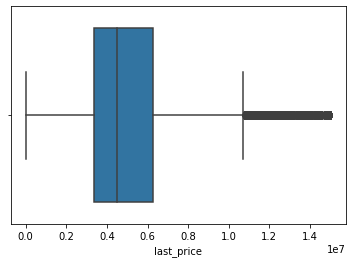

In [116]:
sns.boxplot(x='last_price', data=df)

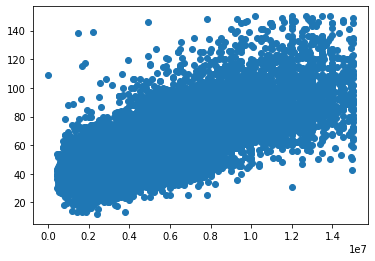

In [117]:
plt.scatter(df['last_price'], df['total_area']);

### <font color='#5F9EA0'># Строим гистограммы зависимостей:

<font color='#5F9EA0'>
    
<ol>
    <li>площади квартиры от количества продаж</li>
    <li>цены квартиры от количества продаж</li>
    <li>числа комнат в квартире от количества продаж</li>
    <li>высоты потолков в квартире от количества продаж</li>
</ol>
    
</font>

In [118]:
# hist plot def

def hist_plot_function(df, columns, bins, ranges, ylims, titles):
   
    for i in range(0, len(columns)):
        print (df[columns[i]].plot(
            kind='hist', 
            bins=bins[i], 
            range=ranges[i],
            ylim=ylims[i],
            title=titles[i],
            figsize=(24, 8)
        ))
        plt.show()
    return

AxesSubplot(0.125,0.125;0.775x0.755)


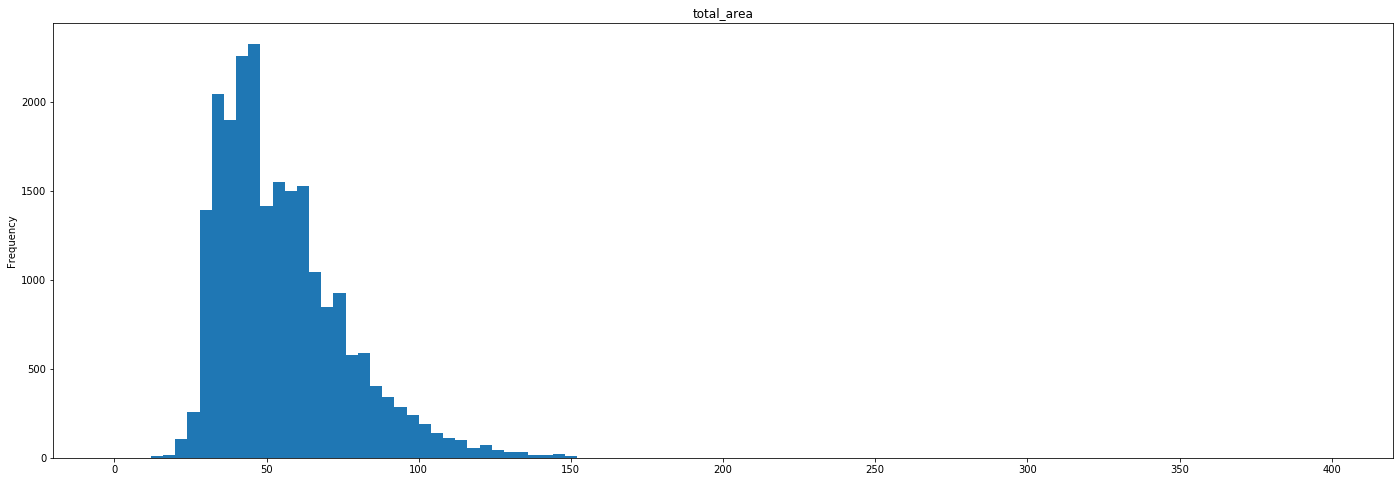

AxesSubplot(0.125,0.125;0.775x0.755)


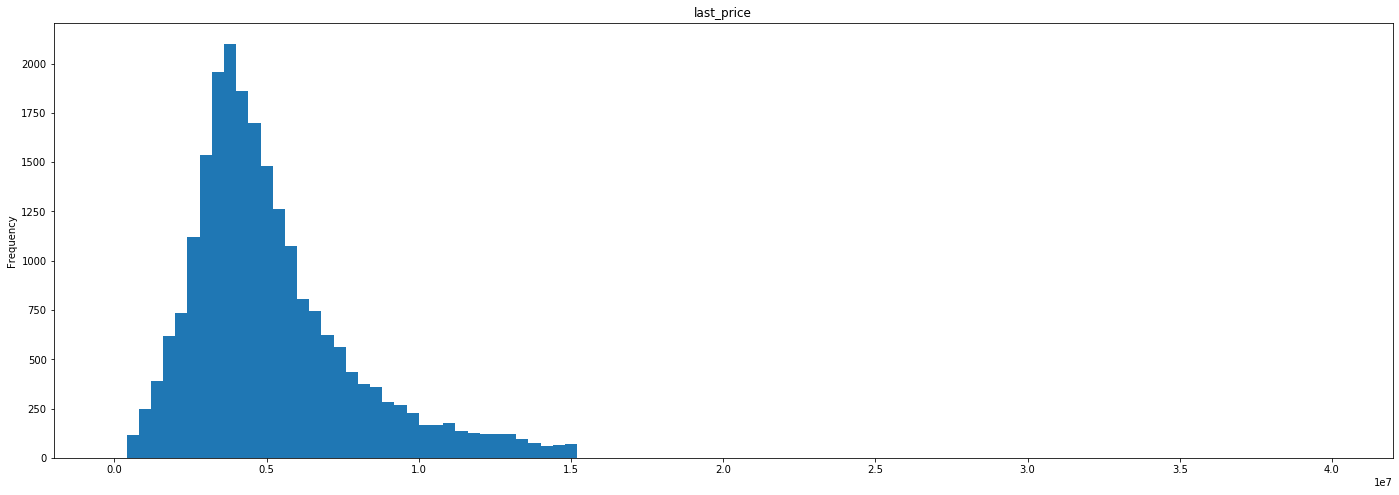

AxesSubplot(0.125,0.125;0.775x0.755)


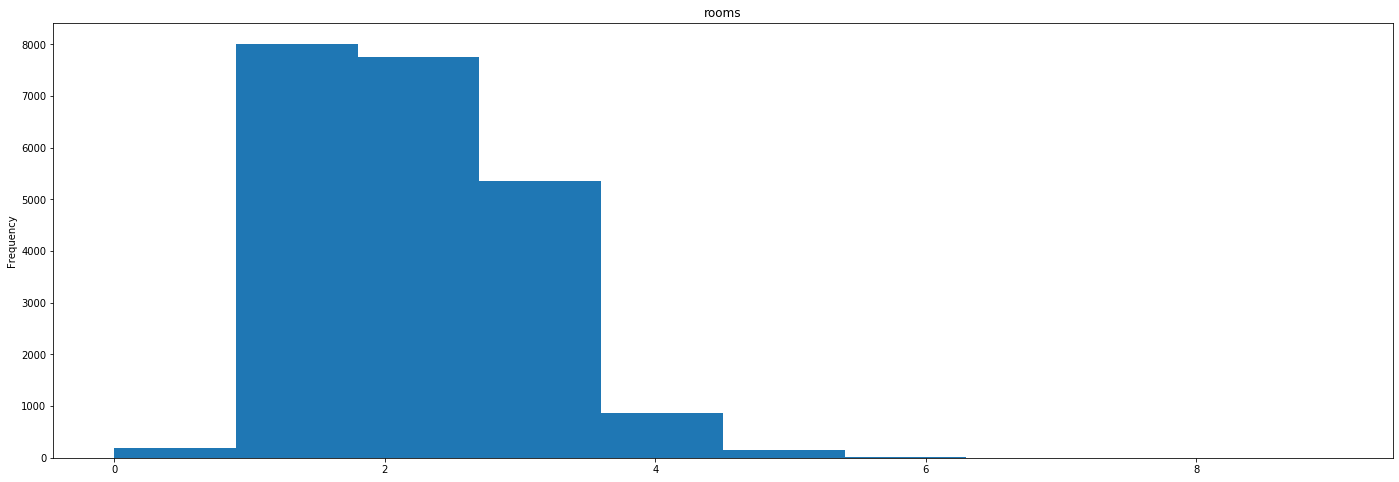

AxesSubplot(0.125,0.125;0.775x0.755)


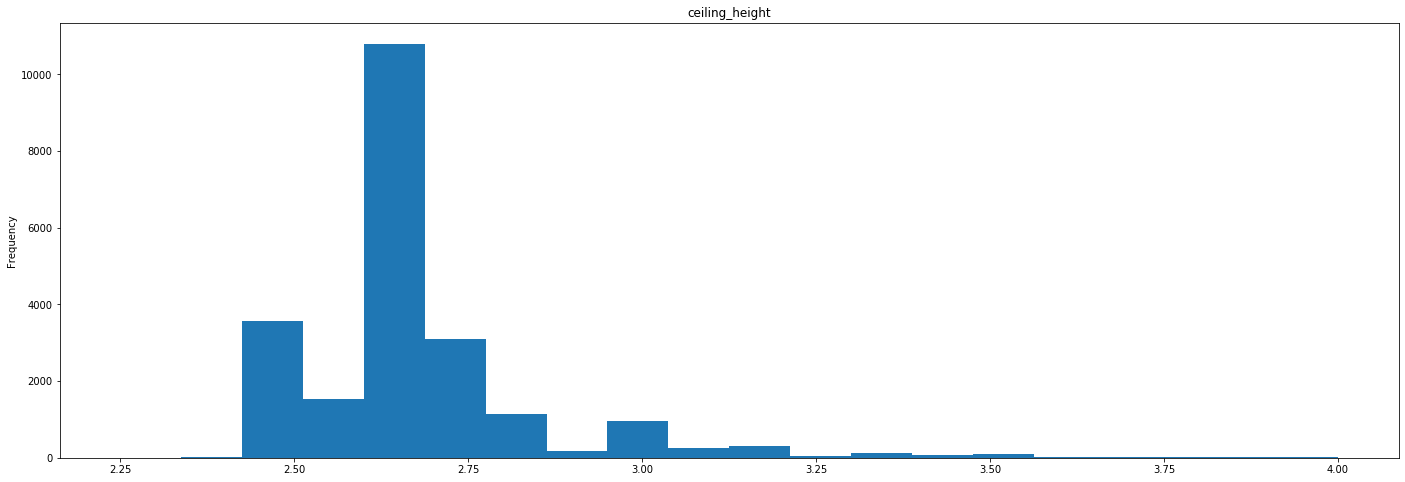

In [119]:
hist_plot_function(
    df, 
    ['total_area', 'last_price', 'rooms', 'ceiling_height'],
    [100, 100, 10, 20],
    [(0, 400), (0, 40000000), (0, 9), (2.25, 4)],
    [None, None, None, None],
    ['total_area', 'last_price', 'rooms', 'ceiling_height']
)

In [120]:
# df['total_area'].hist(bins = 100, range = (0, 400), figsize=(27,8))

# df['last_price'].hist(bins = 100, range = (0, 40000000), figsize=(27,8))

# df['rooms'].hist(bins = 10, range = (0, 9), figsize=(27,8))

# df['ceiling_height'].hist(bins = 20, range = (2.25, 4), figsize=(27,8))

 отмасштабировать: df['rooms'].quantile(.9)

<b>UPD <font color=blue>Лучше range = `(0, df['rooms'].quantile(.9))`. Тогда мы покажем первые 90% данных, без квартир площадью 900 м. и т.д.

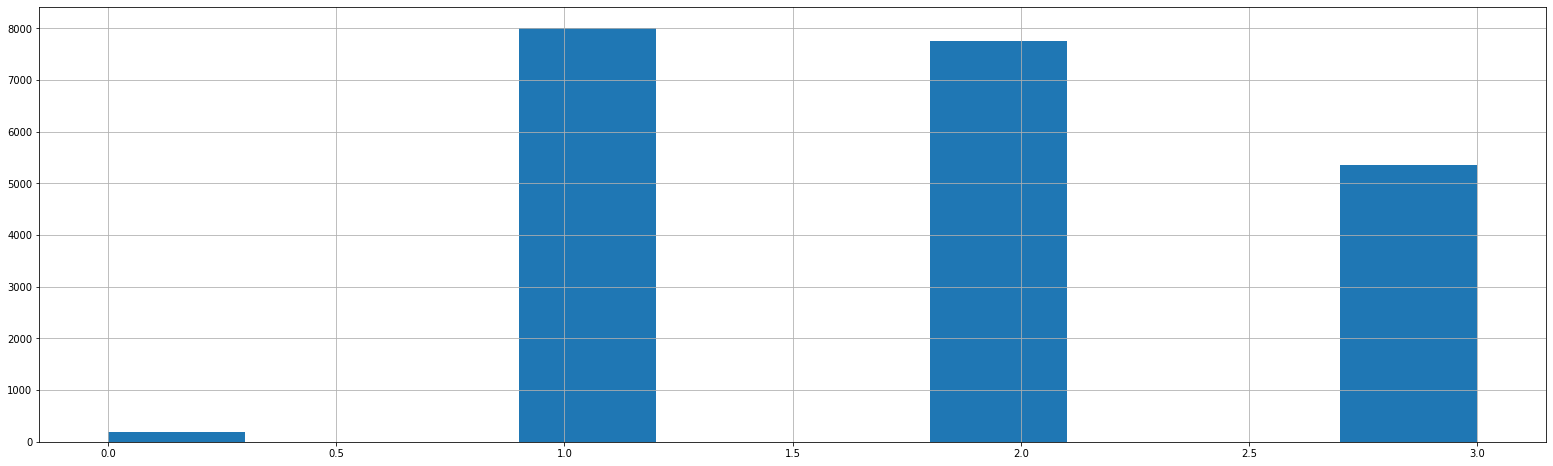

In [121]:
df['rooms'].hist(bins = 10, range = (0, df['rooms'].quantile(.9)), figsize=(27,8))

<font color='#5F9EA0'>#
Очевидные результаты: цена квартиры зависит от цены квадратного метра, площадь квартиры – от количества комнат 


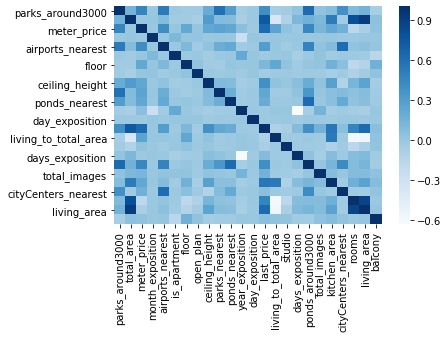

In [122]:
numericalq = list(set(df.columns))

# Calculate and plot
corr_matrixq = df[numericalq].corr()
sns.heatmap(corr_matrixq, cmap="Blues")

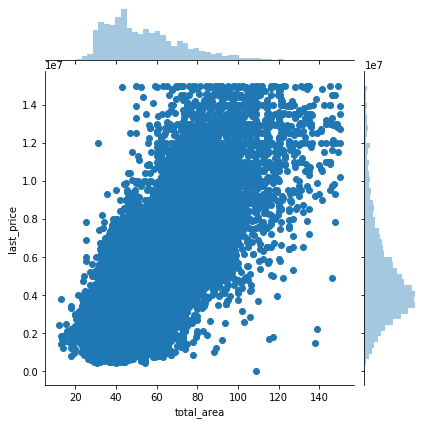

In [123]:
sns.jointplot(x='total_area', y='last_price', data=df, kind='scatter')

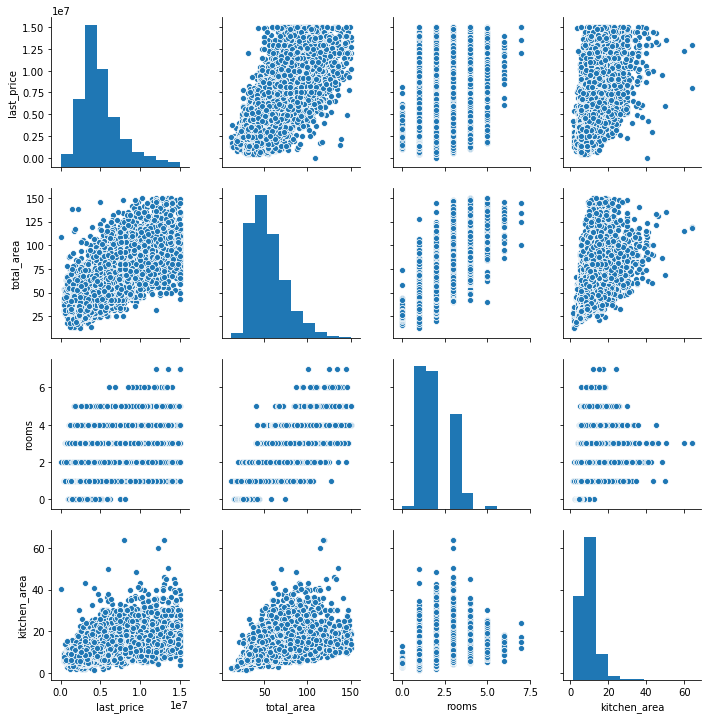

In [124]:
cols = ['last_price', 'total_area', 'rooms', 'kitchen_area', 'locality_name']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

<font color='#5F9EA0'>

<ol>
<li>Лучше всего продаются квартиры с площадью от 35 до 60 м^2</li>
<li>Больше всего квартир с ценой от 2.5 до 5 миллионов</li>
<li>Больше всего пользуются спросом 1,2 и 3-х комнатные квартиры</li>
<li>Самая популярная высота потолков – стандартные 2,7м</li>
<li>Большинство квартир продается довольно быстро. от 0 до 100-150 дней</li>
</ol>
    
</font>

### <font color='#5F9EA0'># Время продажи квартир:

#### <font color='#5F9EA0'># Медиана время продажи квартиры:

In [126]:
df['days_exposition'].median()

78.0

#### <font color='#5F9EA0'># Среднее время продажи квартиры:

In [127]:
df['days_exposition'].mean()

160.7518770110833

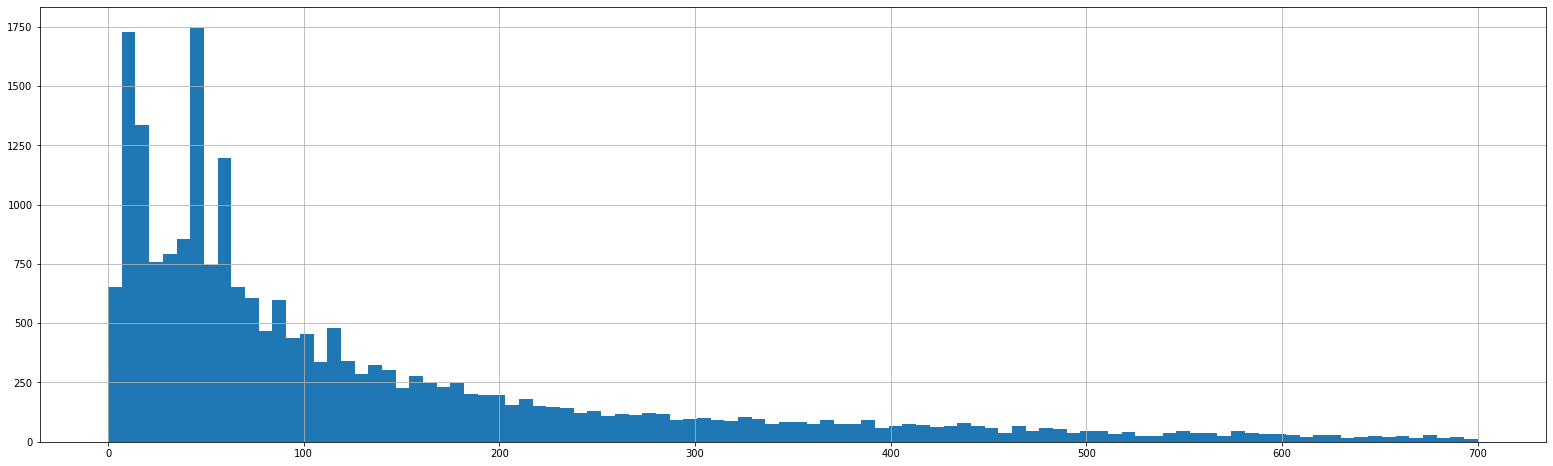

In [128]:
df['days_exposition'].hist(bins = 100, range = (0, 700), figsize=(27,8))

In [129]:
df['days_exposition'].describe(include='all')

count    22376.000000
mean       160.751877
std        207.609012
min          1.000000
25%         38.000000
50%         78.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [130]:
df.query('days_exposition >= 600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition_kat,meter_price,day_exposition,month_exposition,year_exposition,floor_kind_kat,living_to_total_area
23,11,2950000.0,32.00,2016-10-29,1,2.60,11,17.700000,9,True,...,1.0,190.0,615.0,slow,92187.500000,5,10,2016,другой,0.190625
43,13,9330000.0,48.00,2017-01-10,2,3.00,13,28.000000,4,True,...,1.0,492.0,763.0,slow,194375.000000,1,1,2017,другой,0.156250
61,18,7990000.0,74.00,2017-08-24,2,2.65,18,43.000000,4,True,...,0.0,-1.0,609.0,slow,107972.972973,3,8,2017,другой,0.270270
76,12,2800000.0,55.10,2016-05-14,3,2.60,12,38.400000,1,True,...,-1.0,-1.0,606.0,slow,50816.696915,5,5,2016,первый,0.088929
98,11,11700000.0,80.00,2014-12-10,3,2.65,11,55.100000,3,True,...,0.0,-1.0,831.0,slow,146250.000000,2,12,2014,другой,0.137500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.50,2016-09-08,1,2.56,1,19.600000,10,False,...,-1.0,-1.0,627.0,slow,59612.493827,3,9,2016,другой,0.173077
23664,5,9000000.0,110.00,2015-12-10,4,3.36,5,64.600000,5,True,...,1.0,118.0,816.0,slow,81818.181818,3,12,2015,последний,0.143636
23672,5,3000000.0,30.80,2016-06-08,1,2.60,5,16.100000,3,True,...,0.0,-1.0,808.0,slow,97402.597403,2,6,2016,другой,0.204545
23675,8,3550000.0,39.50,2016-10-03,1,2.65,8,19.000000,13,True,...,0.0,-1.0,721.0,slow,89873.417722,0,10,2016,другой,0.215190


<font color='#5F9EA0'>#   Основная масса квартир продается в течении первых 90 дней, потом скорость продаже падает и может длиться долго. Средняя скорость продажи квартир 16 дней

In [131]:
df = df.query('days_exposition <= 600')

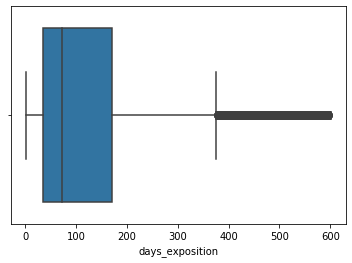

In [132]:
sns.boxplot(x='days_exposition', data=df)

#### <font color='#5F9EA0'># Чистка закончилась, теперь переопределим индексы

In [133]:
df.reset_index(drop=True, inplace=True)

### <font color='#5F9EA0'># Какие факторы больше всего влияют на стоимость квартиры

In [134]:
print ("Зависимость цены от квадратного метра: ")
print (df['last_price'].corr(df['meter_price']))
print ("Зависимость цены от этажа: ")
df['floor_kind_kat_type'] = df['floor_kind_kat'].astype('category').cat.codes
print (df['last_price'].corr(df['floor_kind_kat_type']))
print ("Зависимость цены от количества комнат: ")
print (df['last_price'].corr(df['rooms']))
print ("Зависимость цены от удаленности от цента: ")
print (df['last_price'].corr(df[df['cityCenters_nearest'] != -1]['cityCenters_nearest']))
print ("Зависимость цены от дня публикации: ")
print (df['last_price'].corr(df['day_exposition']))ё
print ("Зависимость цены от месяца публикации: ")
print (df['last_price'].corr(df['month_exposition']))
print ("Зависимость цены от года публикации: ")
print (df['last_price'].corr(df['year_exposition']))

SyntaxError: invalid syntax (<ipython-input-134-7b05df20c42d>, line 11)

In [135]:
df['floor_kind_kat_type'] = df['floor_kind_kat'].astype('category').cat.codes

df_last_price = df[{'meter_price',
                    'floor_kind_kat_type',
                    'rooms',
                    'day_exposition',
                    'month_exposition',
                    'year_exposition',
                    'last_price'
                   }]

print(df_last_price.corr()['last_price'].reset_index(name='correlation'))
print('\n')
print('cityCenters_nearest ', df['last_price'].corr(df[df['cityCenters_nearest'] != -1]['cityCenters_nearest']))

                 index  correlation
0  floor_kind_kat_type    -0.083777
1      year_exposition     0.015816
2       day_exposition    -0.010214
3           last_price     1.000000
4     month_exposition     0.000626
5          meter_price     0.636602
6                rooms     0.477012


cityCenters_nearest  0.06748222725983509


In [136]:
df['floor_kind_kat_type'] = df['floor_kind_kat'].astype('category').cat.codes
df['locality_name_type'] = df['locality_name'].astype('category').cat.codes
df['open_plan_type'] = df['open_plan'].astype('category').cat.codes
df['is_apartment_type'] = df['is_apartment'].astype('category').cat.codes

df_meter_price = df[{'meter_price',
                     'floor_kind_kat_type',
                     'rooms',
                     'day_exposition',
                     'month_exposition',
                     'year_exposition',
                     'locality_name_type',
                     'ceiling_height',
                     'balcony',
                     'open_plan_type',
                     'is_apartment_type'}]


print(df_meter_price.corr()['meter_price'].reset_index(name='correlation'))
print('\n')
print ('cityCenters_nearest ',df['meter_price'].corr(df[df['cityCenters_nearest'] != -1]['cityCenters_nearest']))

                  index  correlation
0   floor_kind_kat_type    -0.111895
1       year_exposition     0.079588
2        day_exposition    -0.009871
3      month_exposition    -0.007520
4           meter_price     1.000000
5        ceiling_height     0.230123
6    locality_name_type    -0.242595
7                 rooms    -0.168879
8               balcony     0.041929
9        open_plan_type     0.015865
10    is_apartment_type     0.014076


cityCenters_nearest  0.16773941472466936


In [137]:
print ("Зависимость цены метра от этажа: ")
df['floor_kind_kat_type'] = df['floor_kind_kat'].astype('category').cat.codes
print (df['meter_price'].corr(df['floor_kind_kat_type']))

print ("Зависимость цены метра от количества комнат: ")
print (df['meter_price'].corr(df['rooms']))
print ("Зависимость цены метра от удаленности от цента: ")
print (df['meter_price'].corr(df[df['cityCenters_nearest'] != -1]['cityCenters_nearest']))
print ("Зависимость цены метра от дня публикации: ")
print (df['meter_price'].corr(df['day_exposition']))
print ("Зависимость цены метра от месяца публикации: ")
print (df['meter_price'].corr(df['month_exposition']))
print ("Зависимость цены метра от года публикации: ")
print (df['meter_price'].corr(df['year_exposition']))

print ("Зависимость цены метра от названия населенного пункта: ")
df['locality_name_type'] = df['locality_name'].astype('category').cat.codes
print (df['meter_price'].corr(df['locality_name_type']))

print ("Зависимость цены метра от высоты потолков: ")
print (df['meter_price'].corr(df['ceiling_height']))   
print ("Зависимость цены метра от кол-ва балконов: ")
print (df['meter_price'].corr(df['balcony']))

print ("Зависимость цены метра от наличия свободной планеровки: ")
df['open_plan_type'] = df['open_plan'].astype('category').cat.codes
print (df['meter_price'].corr(df['open_plan_type']))

print ("Зависимость цены метра от статуса апартаментов: ")
df['is_apartment_type'] = df['is_apartment'].astype('category').cat.codes
print (df['meter_price'].corr(df['is_apartment_type']))

Зависимость цены метра от этажа: 
-0.11189549691790039
Зависимость цены метра от количества комнат: 
-0.16887880036002997
Зависимость цены метра от удаленности от цента: 
0.16773941472466936
Зависимость цены метра от дня публикации: 
-0.009870776808115295
Зависимость цены метра от месяца публикации: 
-0.007520417741198024
Зависимость цены метра от года публикации: 
0.07958828363850294
Зависимость цены метра от названия населенного пункта: 
-0.2425947674728513
Зависимость цены метра от высоты потолков: 
0.2301232422341795
Зависимость цены метра от кол-ва балконов: 
0.04192888862575087
Зависимость цены метра от наличия свободной планеровки: 
0.015865097290432808
Зависимость цены метра от статуса апартаментов: 
0.01407551336325653


### <font color='#5F9EA0'>#  На итоговую стоимость квартиры влияет только стоимость квадратного метра,. Стоимость квадратного метра зависит от удалённости от центра, высоты потолков и количества балконов 

In [138]:
df['floor_kind_kat_type'] = df['floor_kind_kat'].astype('category').cat.codes
df['floor_kind_kat_type'].corr(df['last_price'])

-0.0837765428618837

In [139]:
df['floor_type'] = df['floor'].astype('category').cat.codes
df['floor_type'].corr(df['last_price'])

0.11651085730280542

In [140]:
pivot_day_exposition = df.pivot_table(index = 'day_exposition', values = ['last_price'], aggfunc = ['sum','count','mean','median'])
pivot_day_exposition['day_exposition'] = pivot_day_exposition.index
pivot_day_exposition

,sum,count,mean,median,day_exposition
,last_price,last_price,last_price,last_price,
day_exposition,,,,,
0,1.651630e+10,3242,5.094478e+06,4500000.0,0
1,1.944058e+10,3763,5.166244e+06,4500000.0,1
2,1.799758e+10,3532,5.095576e+06,4500000.0,2
3,1.926390e+10,3785,5.089537e+06,4480000.0,3
4,1.860449e+10,3652,5.094330e+06,4450000.0,4
5,8.809420e+09,1758,5.011046e+06,4450000.0,5
6,7.801106e+09,1545,5.049260e+06,4450000.0,6


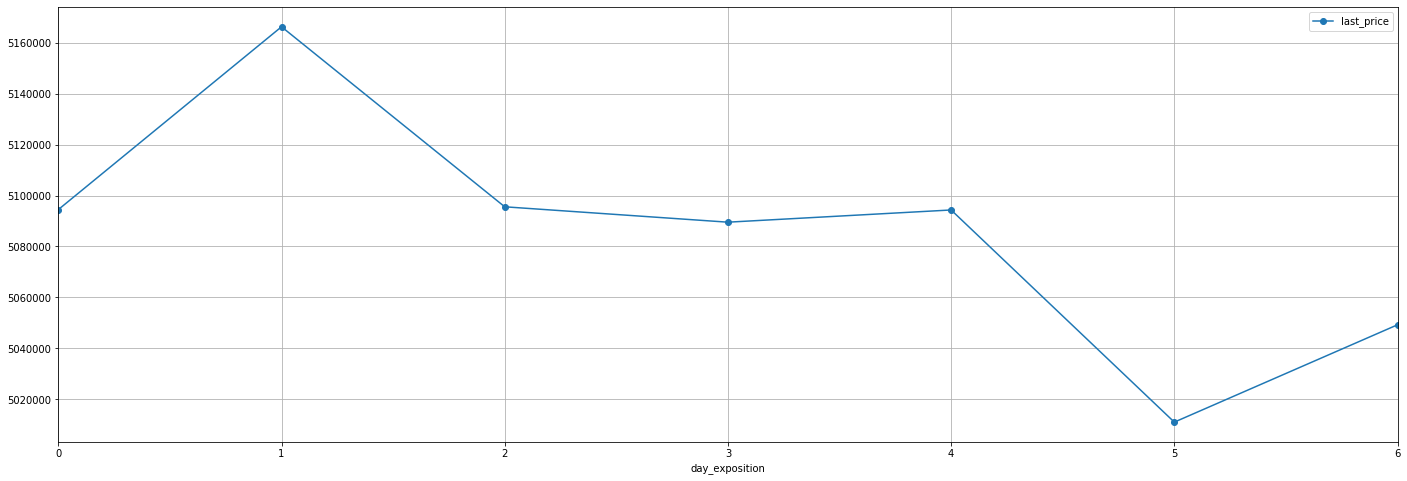

In [141]:
pivot_day_exposition.plot(
    x='day_exposition',
    y='mean',
    style='-o',
    grid=True,
    figsize=(24, 8)
)

In [142]:
pivot_month_exposition = df.pivot_table(index = 'month_exposition', values = ['last_price'], aggfunc = ['sum','count','mean','median'])
pivot_month_exposition['day_exposition'] = pivot_month_exposition.index
pivot_month_exposition

,sum,count,mean,median,day_exposition
,last_price,last_price,last_price,last_price,
month_exposition,,,,,
1,6.724224e+09,1330,5.055807e+06,4500000.0,1
2,1.211542e+10,2380,5.090512e+06,4500000.0,2
3,1.166036e+10,2285,5.103003e+06,4500000.0,3
4,1.130855e+10,2168,5.216120e+06,4650000.0,4
5,5.668725e+09,1119,5.065885e+06,4400000.0,5
6,7.654891e+09,1567,4.885061e+06,4250000.0,6
7,7.772824e+09,1519,5.117067e+06,4450000.0,7
8,8.117906e+09,1592,5.099187e+06,4471000.0,8


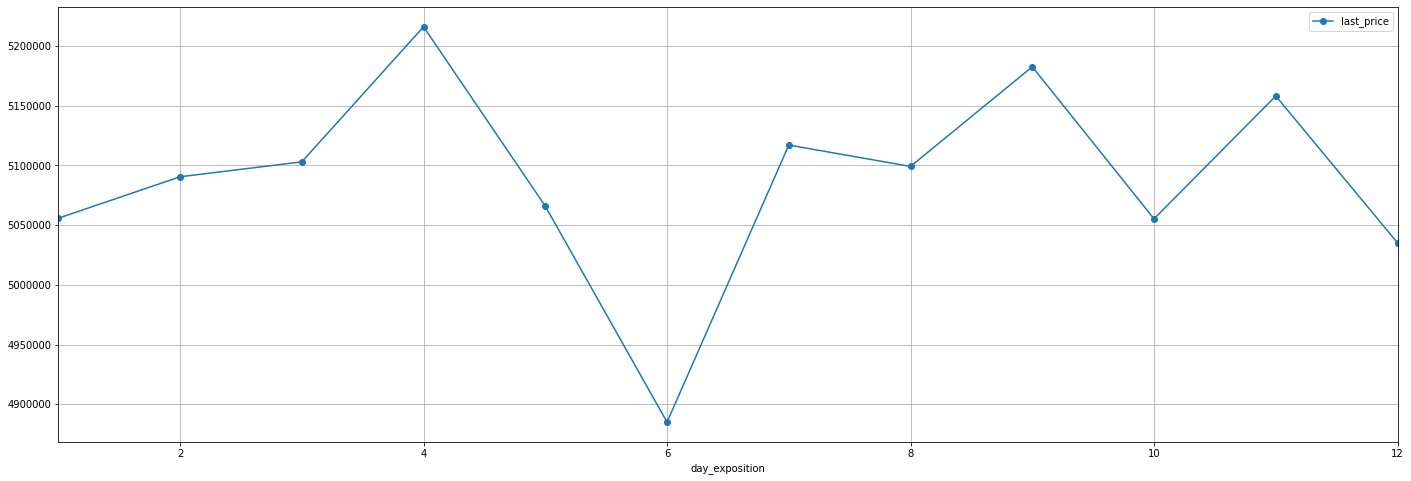

In [143]:
pivot_month_exposition.plot(
    x='day_exposition',
    y='mean',
    style='-o',
    grid=True,
    figsize=(24, 8)
)

In [144]:
pivot_year_exposition = df.pivot_table(index = 'year_exposition', values = ['last_price'], aggfunc = ['sum','count','mean','median'])
pivot_year_exposition['day_exposition'] = pivot_year_exposition.index
pivot_year_exposition

,sum,count,mean,median,day_exposition
,last_price,last_price,last_price,last_price,
year_exposition,,,,,
2014,1.696921e+08,24,7.070505e+06,6827500.0,2014
2015,3.165237e+09,585,5.410661e+06,4880000.0,2015
2016,1.108357e+10,2199,5.040278e+06,4320000.0,2016
2017,3.836266e+10,7613,5.039099e+06,4350000.0,2017
2018,4.093228e+10,8144,5.026066e+06,4490000.0,2018
2019,1.471993e+10,2712,5.427703e+06,4900000.0,2019


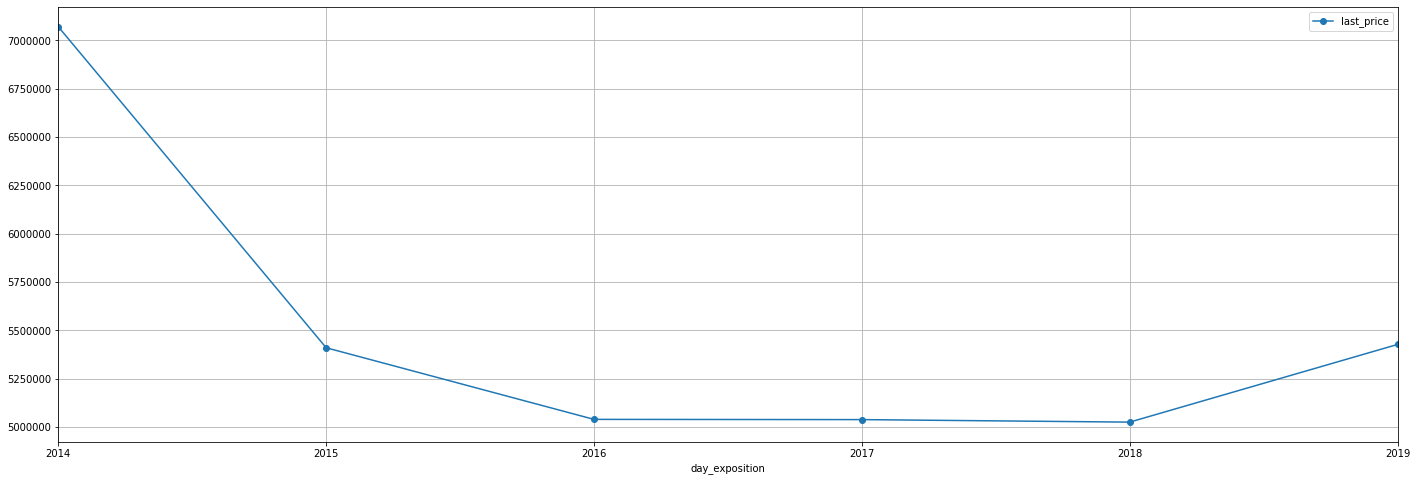

In [145]:
pivot_year_exposition.plot(
    x='day_exposition',
    y='mean',
    style='-o',
    grid=True,
    figsize=(24, 8)
)

### <font color='#5F9EA0'># locality_name:

### <font color='#5F9EA0'># 10 населенных пунктов с наибольшим числом объявлений:

In [146]:
top_locality_name = df.groupby('locality_name')['last_price'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
top_locality_name

,locality_name,count
34,Санкт-Петербург,13730
286,посёлок Мурино,500
321,посёлок Шушары,426
4,Всеволожск,373
33,Пушкин,333
14,Колпино,328
291,посёлок Парголово,317
7,Гатчина,288
92,деревня Кудрово,276
5,Выборг,223


<font color='#5F9EA0'># Средняя цена за метр в этих районах:

In [147]:
def get_mean_square_price(row):
    return df[df['locality_name'] == row]['meter_price'].median().astype(int)

top_locality_name['mean_price'] = top_locality_name['locality_name'].apply(get_mean_square_price)
top_locality_name

,locality_name,count,mean_price
34,Санкт-Петербург,13730,102998
286,посёлок Мурино,500,86076
321,посёлок Шушары,426,76876
4,Всеволожск,373,65686
33,Пушкин,333,99230
14,Колпино,328,74421
291,посёлок Парголово,317,91428
7,Гатчина,288,67860
92,деревня Кудрово,276,92044
5,Выборг,223,58108


In [148]:
print('Самая высокая стоимость жилья в населенном пункте: ',top_locality_name.sort_values(by='mean_price', ascending=False).head(1)['locality_name'].to_string(index=False))
print('Самая низкая стоимость жилья в населенном пункте: ',top_locality_name.sort_values(by='mean_price', ascending=False).tail(1)['locality_name'].to_string(index=False))

Самая высокая стоимость жилья в населенном пункте:   Санкт-Петербург
Самая низкая стоимость жилья в населенном пункте:   Выборг


### <font color='#5F9EA0'># Квартиры в Санкт-Петербурге

In [149]:
spb_df = df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'] > 0)]
spb_df.reset_index(drop=True, inplace=True)

In [150]:
spb_df['cityCenters_nearest'] = spb_df['cityCenters_nearest'].astype(int)

 <font color='#5F9EA0'># средняя цена за км ( мы давно перевели)

In [151]:
def get_mean_per_km(row):
    return spb_df[spb_df['cityCenters_nearest'] == row]['last_price'].median().astype(int)

km = spb_df['cityCenters_nearest'].value_counts().index
spb_df_km = pd.DataFrame({'km': km})
spb_df_km['city_price_mean'] = spb_df_km['km'].apply(get_mean_per_km)
spb_df_km

,km,city_price_mean
0,12,4980000
1,14,4800000
2,13,5105000
3,11,4950000
4,15,4800000
5,16,4600000
6,10,4900000
7,9,4900000
8,4,8300000
9,8,5970000


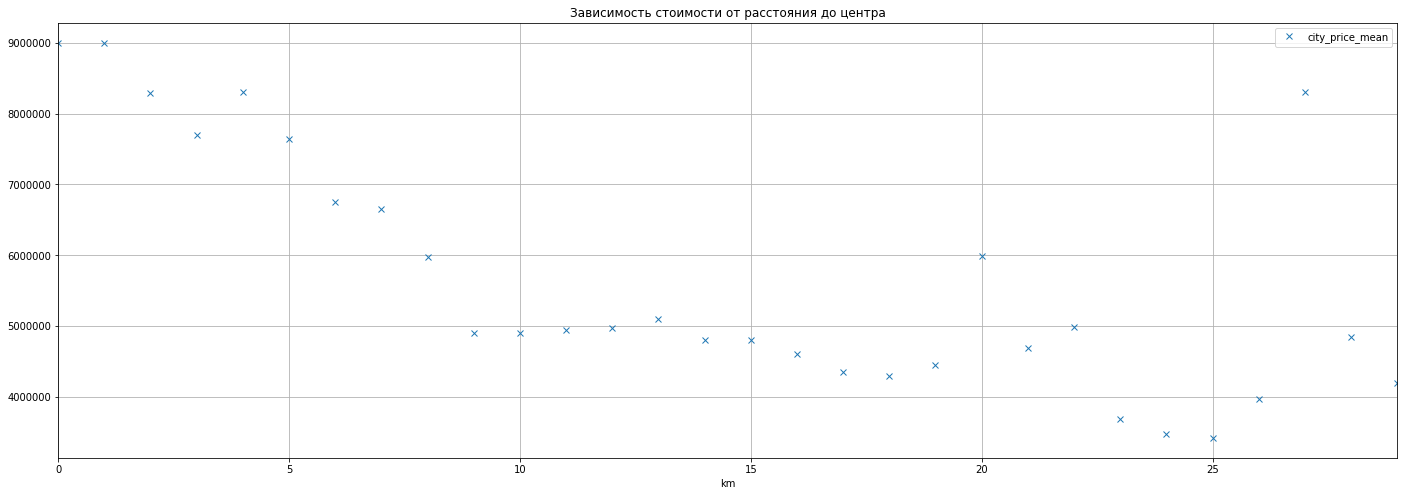

In [152]:
spb_df_km.plot(
    x='km',
    y='city_price_mean',
    style='x',
    grid=True,
    figsize=(24, 8),
    title='Зависимость стоимости от расстояния до центра'
)

In [153]:
pivot_spb = spb_df.pivot_table(index = 'cityCenters_nearest', values = ['last_price'], aggfunc = ['mean'])
pivot_spb

,mean
,last_price
cityCenters_nearest,
0,9.269096e+06
1,9.239681e+06
2,8.478299e+06
3,8.212418e+06
4,8.602214e+06
5,7.904073e+06
6,7.484136e+06
7,7.302007e+06


In [154]:
pivot_spb['cityCenters_nearest'] = pivot_spb.index

In [155]:
pivot_spb['meann'] = pivot_spb['mean']

In [156]:
pivot_spb

,mean,cityCenters_nearest,meann
,last_price,,
cityCenters_nearest,,,
0,9.269096e+06,0,9.269096e+06
1,9.239681e+06,1,9.239681e+06
2,8.478299e+06,2,8.478299e+06
3,8.212418e+06,3,8.212418e+06
4,8.602214e+06,4,8.602214e+06
5,7.904073e+06,5,7.904073e+06
6,7.484136e+06,6,7.484136e+06
7,7.302007e+06,7,7.302007e+06


Вообще есть резкий спад после 7 км, можно было бы и это расстояние взять за радиус центра 

<font color='#5F9EA0'>#  В Санкт-Петербурге радиус центра – 8км

### <font color='#5F9EA0'># Средняя цену для каждого километра

In [157]:
spb_center = spb_df[spb_df['cityCenters_nearest'] < 7]
spb_center.reset_index(drop=True, inplace=True)

def get_median(df, columns, names):
    print ("\n")
    for i in range(0, len(columns)):
        print (f"Медиана {names[i]}: {df[columns[i]].median().round(3)}")
    return 

print ("\n Центр Санкт-Петербурга:")
print (spb_center.corr()['last_price'].reset_index(name='correlation'))
get_median(
    spb_center,
    [
        'last_price',
        'ceiling_height',
        'living_area',
        'kitchen_area',
        'rooms',
    ],
    [
        'цены квартиры',
        'высоты потолков',
        'жилой площади',
        'площади кухни',
        'количества комнат',
    ]
)

print ("\n Весь город: ")
print (spb_df.corr()['last_price'].reset_index(name='correlation'))
get_median(
    spb_df,
    [
        'last_price',
        'ceiling_height',
        'living_area',
        'kitchen_area',
        'rooms',
    ],
    [
        'цены квартиры',
        'высоты потолков',
        'жилой площади',
        'площади кухни',
        'количества комнат',
    ]
)


 Центр Санкт-Петербурга:
                   index  correlation
0           total_images     0.095098
1             last_price     1.000000
2             total_area     0.700861
3                  rooms     0.475355
4         ceiling_height     0.177962
5            living_area     0.600744
6                  floor     0.133923
7           is_apartment    -0.014371
8                 studio    -0.085384
9              open_plan    -0.045141
10          kitchen_area     0.474005
11               balcony     0.093458
12      airports_nearest     0.026132
13   cityCenters_nearest    -0.143269
14      parks_around3000     0.044051
15         parks_nearest     0.047310
16      ponds_around3000    -0.003663
17         ponds_nearest     0.001576
18       days_exposition     0.078025
19           meter_price     0.308051
20        day_exposition     0.028217
21      month_exposition    -0.025832
22       year_exposition     0.018490
23  living_to_total_area    -0.128154
24   floor_kind_kat_type

AxesSubplot(0.125,0.125;0.775x0.755)


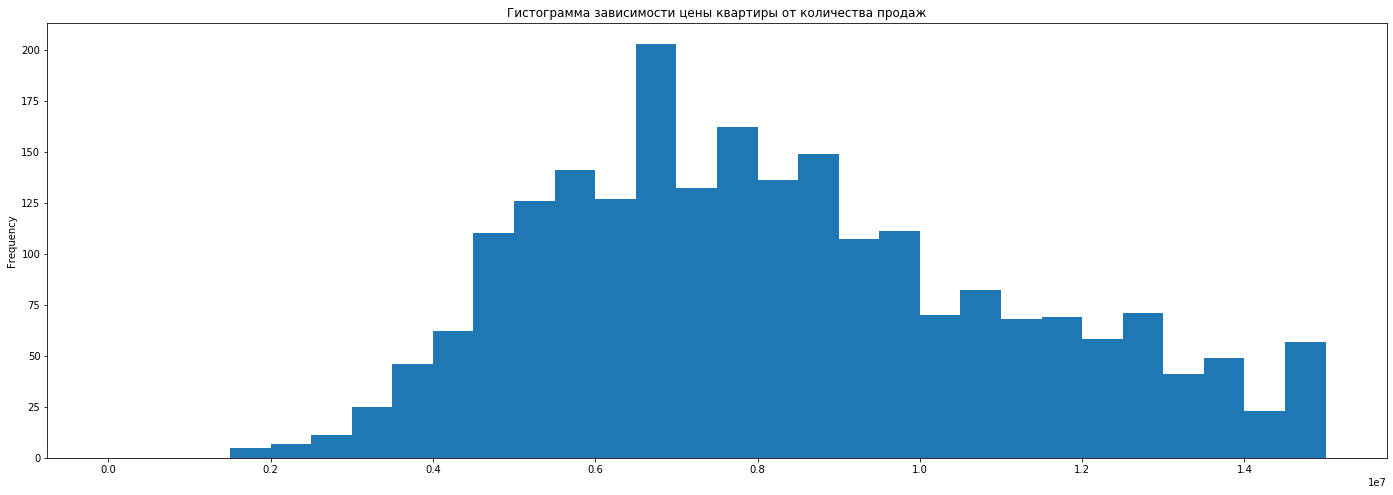

AxesSubplot(0.125,0.125;0.775x0.755)


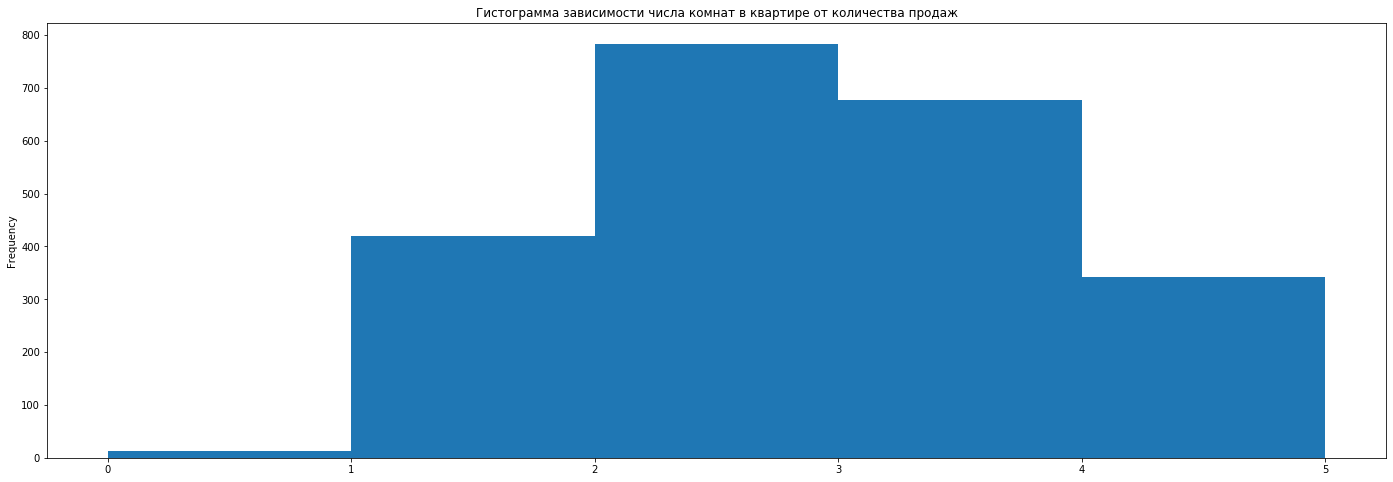

AxesSubplot(0.125,0.125;0.775x0.755)


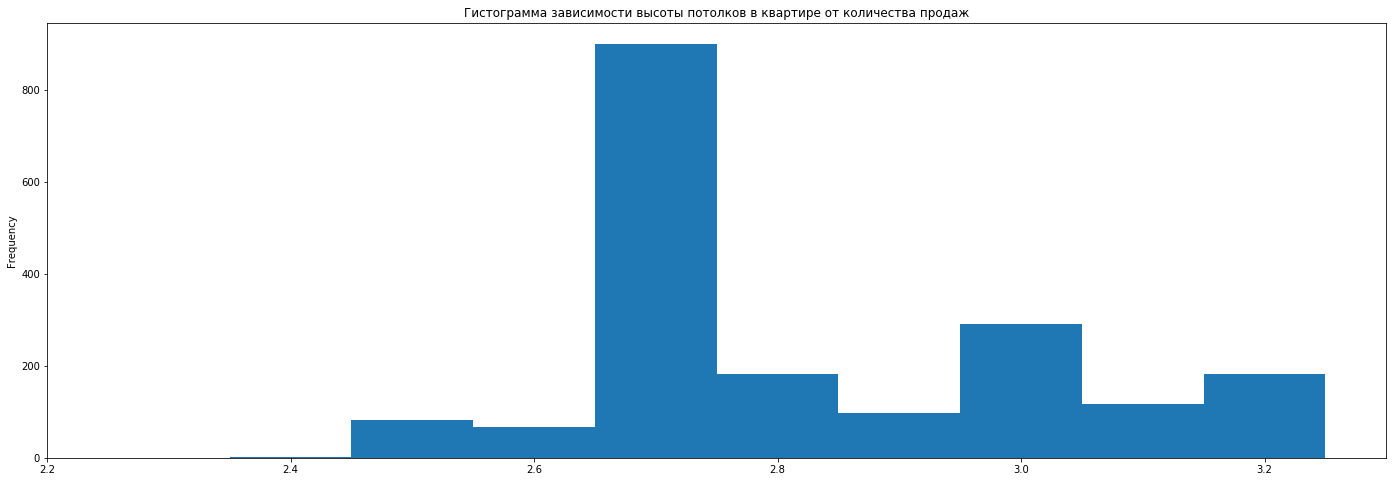

AxesSubplot(0.125,0.125;0.775x0.755)


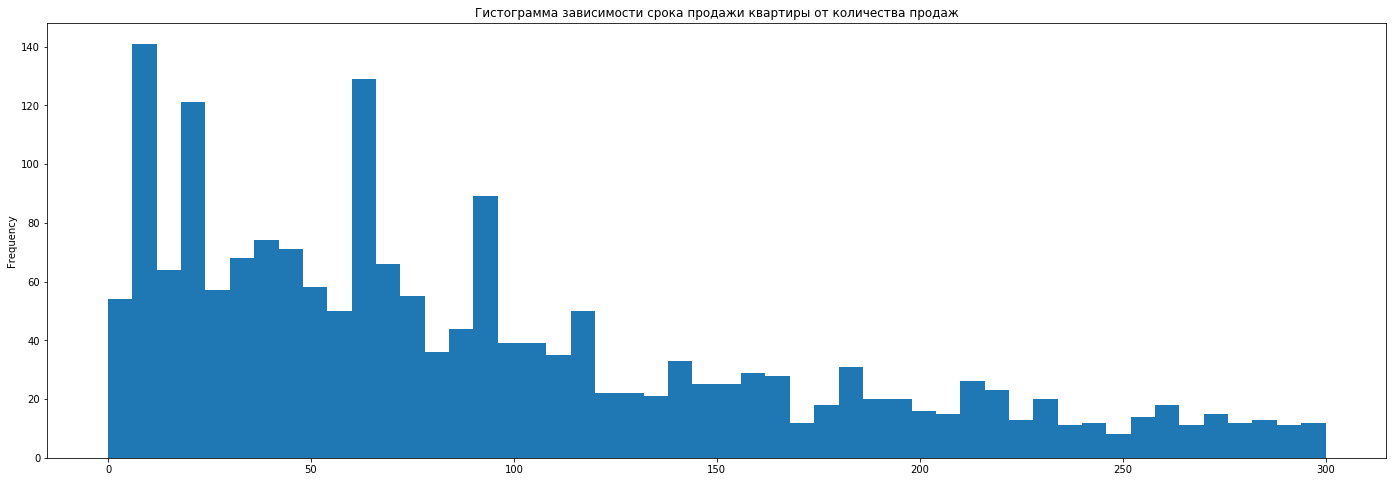

In [158]:
hist_plot_function(
    spb_center, 
    ['last_price', 'rooms', 'ceiling_height', 'days_exposition'],
    [30, 5, 10, 50],
    [(0, 15000000), (0, 5), (2.25, 3.25), (0, 300)],
    [None, None, None, None],
    [
        'Гистограмма зависимости цены квартиры от количества продаж',
        'Гистограмма зависимости числа комнат в квартире от количества продаж',
        'Гистограмма зависимости высоты потолков в квартире от количества продаж',
        'Гистограмма зависимости срока продажи квартиры от количества продаж'
    ]
)

### Шаг 5. Общий вывод

 <font color='#5F9EA0'>На стоимость квартиры больше всего влияет цена квадратного метра, расположение квартиры относительно центра и количество комнат.<br>
    В Санкт-Петербурге квартиры в центре дороже приблизительно в полтора раза, но при этом, судя по жилой площади и площади кухни, планировка лучше.<br>
    Самые дешевые объявления размещаются в выходные где-то в июне. А самые дорогие объявления, несмотря на их маленькое количество в 24 шт, публиковались в 2014 году.<br>
    Цена просела после 2014 года из-за кризиса и до сих пор не восстановилась.<br>
    В крупных городах объявлений больше, чем в мелких населённых пунктах.<br>
    Радиус центра в Питере приблизительно 7км.
</font>